In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from keras.layers import Dropout, BatchNormalization, Activation
from keras.regularizers import l2
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


c:\users\gaogaigar\anaconda3\envs\pythongpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 7699189 samples, validate on 1924798 samples
Epoch 1/25
7699189/7699189 [==============================] - 369s 48us/step - loss: 0.7703 - mse: 0.7703 - val_loss: 0.7196 - val_mse: 0.7196
Epoch 2/25
7699189/7699189 [==============================] - 362s 47us/step - loss: 0.7214 - mse: 0.7214 - val_loss: 0.7007 - val_mse: 0.7007
Epoch 3/25
7699189/7699189 [==============================] - 363s 47us/step - loss: 0.7048 - mse: 0.7048 - val_loss: 0.6926 - val_mse: 0.6926
Epoch 4/25
7699189/7699189 [==============================] - 364s 47us/step - loss: 0.6939 - mse: 0.6939 - val_loss: 0.6753 - val_mse: 0.6753
Epoch 5/25
7699189/7699189 [==============================] - 364s 47us/step - loss: 0.6859 - mse: 0.6859 - val_loss: 0.6707 - val_mse: 0.6707
Epoch 6/25
7699189/7699189 [==============================] - 364s 47us/step - loss: 0.6809 - mse: 0.6809 - val_loss: 0.6656 - val_mse: 0.6656
Epoch 7/25
7699189/7699189 [==============================] - 366s 48us/step - loss: 0.6

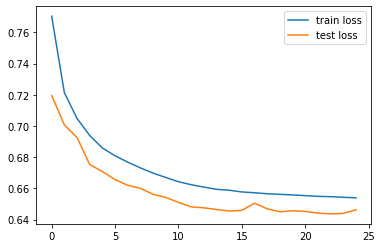

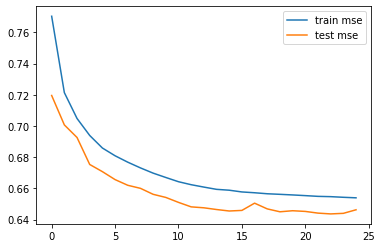

In [2]:
# load in the data
df = pd.read_csv('shrink_rating.csv')

N = df.user_id.max() + 1 # number of users
M = df.movie_id.max() + 1 # number of movies

# split into train and test
df = shuffle(df)
cutoff = int(0.8*len(df))
df_train = df.iloc[:cutoff]
df_test = df.iloc[cutoff:]

# initialize variables
K = 10 # latent dimensionality
mu = df_train.rating.mean()
epochs = 25
# reg = 0.0001 # regularization penalty


# keras model
u = Input(shape=(1,))
m = Input(shape=(1,))
u_embedding = Embedding(N, K)(u) # (N, 1, K)
m_embedding = Embedding(M, K)(m) # (N, 1, K)
u_embedding = Flatten()(u_embedding) # (N, K)
m_embedding = Flatten()(m_embedding) # (N, K)
x = Concatenate()([u_embedding, m_embedding]) # (N, 2K)

# the neural network
x = Dense(400)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(100)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(1)(x)

model = Model(inputs=[u, m], outputs=x)
model.compile(
  loss='mse',
  #optimizer='adam',
  optimizer=Adam(lr=0.01),
  #optimizer=SGD(lr=0.08, momentum=0.9),
  metrics=['mse'],
)

r = model.fit(
  x=[df_train.user_id.values, df_train.movie_id.values],
  y=df_train.rating.values - mu,
  epochs=epochs,
  batch_size=128,
  validation_data=(
    [df_test.user_id.values, df_test.movie_id.values],
    df_test.rating.values - mu
  )
)

# plot losses
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()

# plot mse
plt.plot(r.history['mse'], label="train mse")
plt.plot(r.history['val_mse'], label="test mse")
plt.legend()
plt.show()

In [3]:
# Just for record
print('The resulting val_loss is about: {}'.format(r.history['val_loss'][-1]))
print('The resulting val_mse is about: {}'.format(r.history['val_mse'][-1]))

The resulting val_loss is about: 0.646296770843808
The resulting val_mse is about: 0.6462969183921814


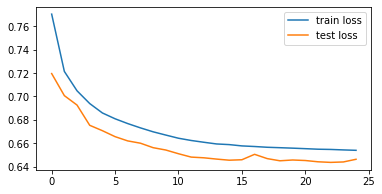

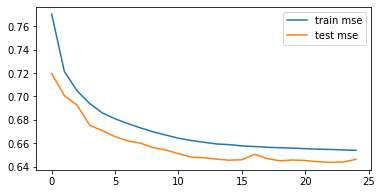

In [4]:
plt.figure(figsize = (6, 3))
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()

# plot mse
plt.figure(figsize = (6, 3))
plt.plot(r.history['mse'], label="train mse")
plt.plot(r.history['val_mse'], label="test mse")
plt.legend()
plt.show()

In [5]:
 0.6819039583206177**(1/2)

0.8257747624628751